# Clase 2

In [19]:
import pandas as pd
import numpy as np


In [5]:
archivo = r'/workspaces/CA-417_JimenaChacon/^SPX.csv'
datosspx = pd.read_csv(archivo)

In [6]:
datosspx

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-25,1092.400024,1102.969971,1092.400024,1096.780029,1096.780029,4481390000
1,2010-01-26,1095.800049,1103.689941,1089.859985,1092.170044,1092.170044,4731910000
2,2010-01-27,1091.939941,1099.510010,1083.109985,1097.500000,1097.500000,5319120000
3,2010-01-28,1096.930054,1100.219971,1078.459961,1084.530029,1084.530029,5452400000
4,2010-01-29,1087.609985,1096.449951,1071.589966,1073.869995,1073.869995,5412850000
...,...,...,...,...,...,...,...
3665,2024-08-16,5530.500000,5561.979980,5525.169922,5554.250000,5554.250000,3357690000
3666,2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000
3667,2024-08-20,5602.879883,5620.509766,5585.500000,5597.120117,5597.120117,2994420000
3668,2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000


In [7]:
datosspx.dtypes
#Verificar las columnas tiene el tipo de variable adecuado

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
datosspx['Date'] = pd.to_datetime(datosspx["Date"])
datosspx.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
sp500 = pd.Series(data=datosspx["Adj Close"].values, index=datosspx["Date"])
sp500

Date
2010-01-25    1096.780029
2010-01-26    1092.170044
2010-01-27    1097.500000
2010-01-28    1084.530029
2010-01-29    1073.869995
                 ...     
2024-08-16    5554.250000
2024-08-19    5608.250000
2024-08-20    5597.120117
2024-08-21    5620.850098
2024-08-22    5570.640137
Length: 3670, dtype: float64

<Axes: xlabel='Date'>

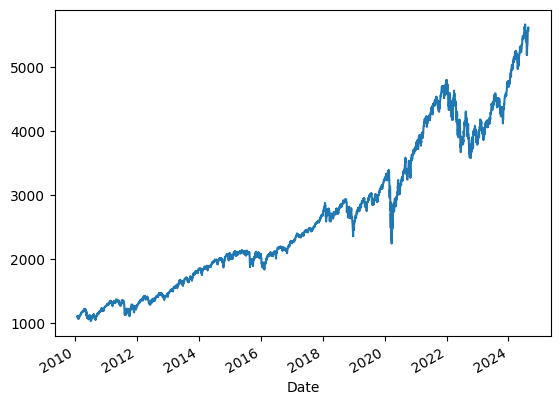

In [10]:
sp500.plot()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

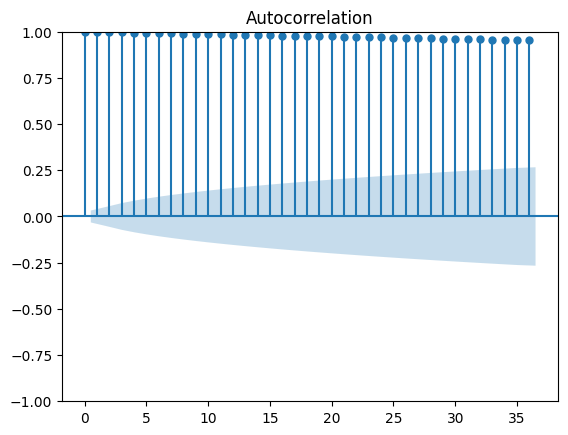

In [14]:
plot_acf(sp500);

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

In [17]:
#Prueba de Dickey - Fuller
#H_0 : Serie no es estacionaria
#H_1: Es estacionaria


dftest = adfuller(sp500, regression='c', autolag= "AIC")
dftest

(np.float64(1.02326280881426),
 np.float64(0.994505433858256),
 27,
 3642,
 {'1%': np.float64(-3.4321467915965354),
  '5%': np.float64(-2.8623339224510462),
  '10%': np.float64(-2.5671926170454467)},
 np.float64(35234.54996617058))

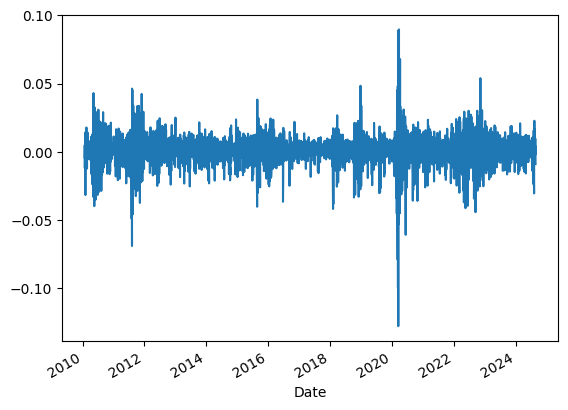

In [22]:
dlsp500 = np.log(sp500).diff().dropna()
dlsp500.plot();

Desviación estándar: 0.010952401453062838


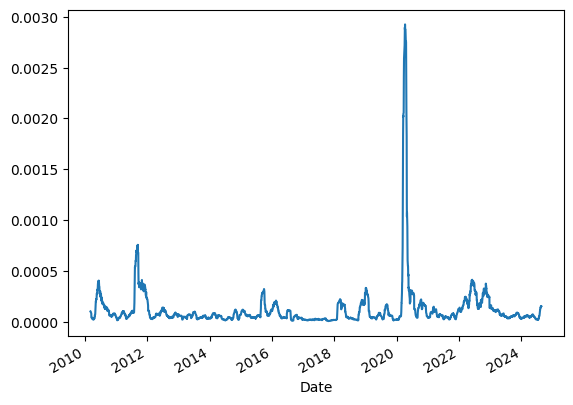

In [33]:
#Ventana móvil de 30 días
dlsp500.rolling(30).var().plot();
print("Desviación estándar:",dlsp500.std()) #Desviación estándar

<Axes: xlabel='Date'>

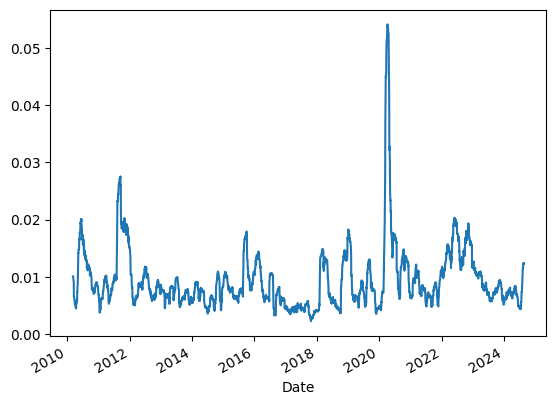

In [35]:
dlsp500.rolling(30).std().plot()

<Axes: xlabel='Date'>

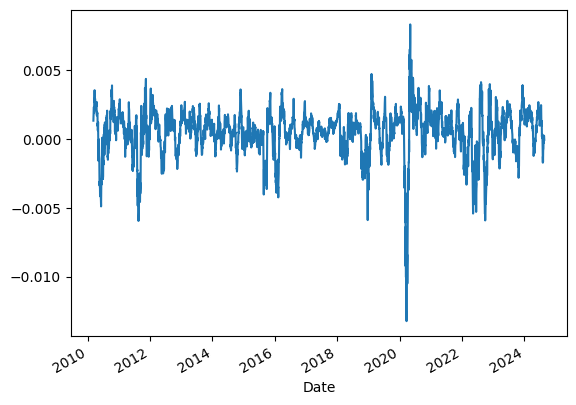

In [36]:
dlsp500.rolling(30).mean().plot()

<Axes: xlabel='Date'>

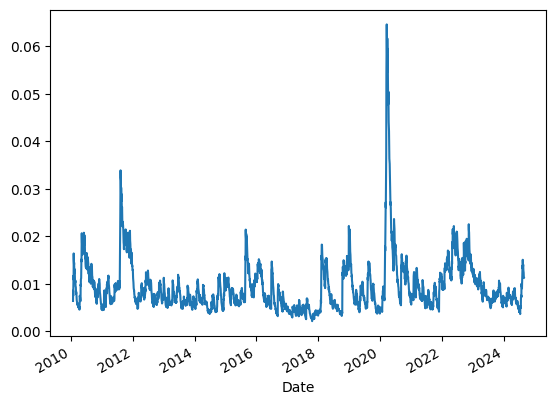

In [44]:
#Exponentially Weighted Moving Average (EWMA)
prom_nov = dlsp500.ewm(alpha=0.1).std()
prom_nov.plot()

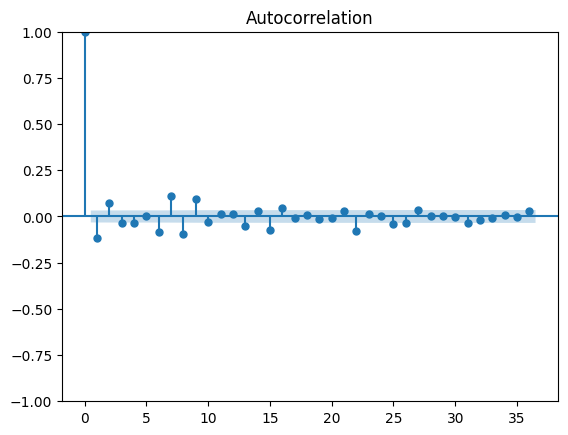

In [47]:
plot_acf(dlsp500);

In [52]:
import seaborn as sb

In [49]:
dlsp500_lag1 = dlsp500.shift()

In [51]:
data1 = pd.DataFrame({'sp':dlsp500, 'sp1': dlsp500_lag1})

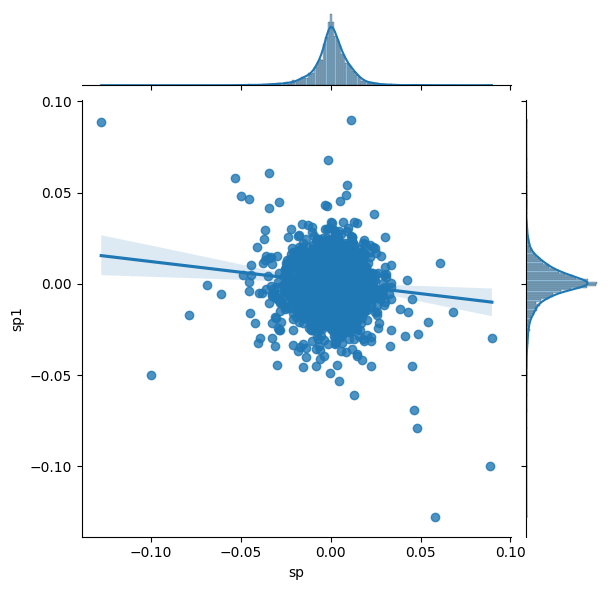

In [54]:
sb.jointplot(data1, x='sp', y='sp1', kind='reg')
#Si el limite inferior del área sombreada está por encima de 0, acepto la hipótesis de que existe dependencia.